In [ ]:
!pip install trnlp
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for trnlp: filename=trnlp-0.2.3a0-py3-none-any.whl size=10168260 sha256=4d823b34438ff0041a24b936e75391a66c29b46a48c893af38bb4bb90dde5019
  Stored in directory: /root/.cache/pip/wheels/81/d9/ac/71ce93f1a1df771aab1d35251803c30fef1e279a2d985bf928
Successfully built trnlp


In [ ]:
# Gerekli kütüphaneler
import pandas as pd

# Yorumları ve excel dosyasını okuma
df = pd.read_excel('Ajet50yorum_biletcom.xlsx')

# Anahtar kelimeleri genişletme (pozitif ve negatif kelimelerle)
categories = {
    'Uçuş Arama Deneyimi': {
        'pozitif': ['kolay buldum', 'sorunsuz', 'hızlı', 'iyi', 'güzel'],
        'negatif': ['zor buldum', 'hatalı', 'bulamadım', 'zaman kaybı', 'sonuçsuz', 'uzun sürdü']
    },
    'Destinasyonlar': {
        'pozitif': ['geniş destinasyon', 'her yere', 'sefer yeterli', 'uygun rota'],
        'negatif': ['sınırlı destinasyon', 'eksik rota', 'uçuş yok', 'istediğim yere yok']
    },
    'Ödeme / Biletleme Deneyimi': {
        'pozitif': ['kolay ödeme', 'hızlı işlem', 'sorunsuz biletleme', 'başarılı'],
        'negatif': ['ödeme sorunu', 'bilet hatası', 'işlem yapılmadı', 'gecikti']
    },
    'Ücret Politikası': {
        'pozitif': ['uygun fiyat', 'hesaplı', 'avantajlı'],
        'negatif': ['pahalı', 'kazık', 'fazla ücret', 'gereksiz', 'para']
    },
    'Uçuş Deneyimi': {
        'pozitif': ['memnun', 'keyifli', 'rahat', 'iyi', 'sorunsuz', 'güler yüzlü', 'hızlı', 'başarılı'],
        'negatif': ['zarar', 'şikayet', 'sorun', 'gecikme', 'beklemeli', 'berbat', 'geç', 'telafi etmiyorlar', 'rahatsızım', 'muzdaribim']
    }
}


# Yorumları kategorilere ayıran fonksiyon
def categorize_comment(yorum):
    for category, keywords in categories.items():
        if any(keyword in yorum.lower() for keyword in keywords['pozitif'] + keywords['negatif']):
            return category
    return 'Diğer'

# Sentiment analizini anahtar kelimelere göre yapma
def get_sentiment_keywords(yorum):
    for category, keywords in categories.items():
        if any(kw in yorum.lower() for kw in keywords['pozitif']):
            return 'Pozitif'
        if any(kw in yorum.lower() for kw in keywords['negatif']):
            return 'Negatif'
    return 'Nötr'

# Kategorilere ayırma
df['Kategori'] = df['Yorum'].apply(categorize_comment)

# Anahtar kelimelere göre sentiment analizini uygulama
df['Sentiment'] = df['Yorum'].apply(get_sentiment_keywords)

# Pulse skorunu hesaplama için sentiment puanı ekleme
def sentiment_score(sentiment):
    if sentiment == 'Pozitif':
        return 1
    elif sentiment == 'Negatif':
        return -1
    else:
        return 0

df['Sentiment Score'] = df['Sentiment'].apply(sentiment_score)

# Pulse skorunu kategorilere göre hesaplama
pulse_scores = df.groupby('Kategori')['Sentiment Score'].sum()

# Sonuçları göster
print("Kategorilere göre pulse skoru:")
print(pulse_scores)

# Sonuçları Excel dosyasına kaydetme
pulse_scores.to_excel('pulse_skorlari.xlsx')


Kategorilere göre pulse skoru:
Kategori
Diğer                   0
Uçuş Arama Deneyimi    13
Uçuş Deneyimi          17
Name: Sentiment Score, dtype: int64


In [ ]:
# Her bir yorumun sentiment skorunu göster
df['Sentiment Scores'] = df['Yorum'].apply(lambda x: sid.polarity_scores(x)['compound'])
print(df[['Yorum', 'Kategori', 'Sentiment', 'Sentiment Scores']])

                                                Yorum             Kategori  \
0                                              Memnun        Uçuş Deneyimi   
1   Hizmetinizden çok memnun kaldım personel ve ha...  Uçuş Arama Deneyimi   
2   23 45 geçe kalkacak uçak 00 10 da kalktı ve iç...        Uçuş Deneyimi   
3                                İkram servisi olmalı                Diğer   
4          Evet memnunuz hizmetten dolayı teşekkürler        Uçuş Deneyimi   
5                                         Teşekkürler                Diğer   
6   Hiç bir sıkıntı yaşamadım.Güzel bir yolculuktu...  Uçuş Arama Deneyimi   
7                                   Çok memnun kaldım        Uçuş Deneyimi   
8   Memnunum ama her gidiş dönüş te valizim zarar ...        Uçuş Deneyimi   
9   İlginizden dolayı teşekkür ederim harika ve aş...        Uçuş Deneyimi   
10  Bilet alımından, biniş yolculuk aşamasına kada...        Uçuş Deneyimi   
11                                      Memnun kaldım        Uçu

In [ ]:
!pip install vaderSentiment

# Gerekli kütüphaneler
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Yorumları ve excel dosyasını okuma
df = pd.read_excel('Ajet50yorum_biletcom.xlsx')

# Anahtar kelimeleri genişletme (pozitif ve negatif kelimelerle)
categories = {
    'Uçuş Arama Deneyimi': {
        'pozitif': ['kolay buldum', 'sorunsuz', 'hızlı', 'iyi', 'güzel'],
        'negatif': ['zor buldum', 'hatalı', 'bulamadım', 'zaman kaybı', 'sonuçsuz', 'uzun sürdü']
    },
    'Destinasyonlar': {
        'pozitif': ['geniş destinasyon', 'her yere', 'sefer yeterli', 'uygun rota'],
        'negatif': ['sınırlı destinasyon', 'eksik rota', 'uçuş yok', 'istediğim yere yok']
    },
    'Ödeme / Biletleme Deneyimi': {
        'pozitif': ['kolay ödeme', 'hızlı işlem', 'sorunsuz biletleme', 'başarılı'],
        'negatif': ['ödeme sorunu', 'bilet hatası', 'işlem yapılmadı', 'gecikti']
    },
    'Ücret Politikası': {
        'pozitif': ['uygun fiyat', 'hesaplı', 'avantajlı'],
        'negatif': ['pahalı', 'kazık', 'fazla ücret', 'gereksiz', 'para']
    },
    'Uçuş Deneyimi': {
        'pozitif': ['memnun', 'keyifli', 'rahat', 'iyi', 'sorunsuz', 'güler yüzlü', 'hızlı', 'başarılı'],
        'negatif': ['zarar', 'şikayet', 'sorun', 'gecikme', 'beklemeli', 'berbat', 'geç', 'telafi etmiyorlar', 'rahatsızım', 'muzdaribim']
    }
}

# Yorumları kategorilere ayıran fonksiyon
def categorize_comment(yorum):
    for category, keywords in categories.items():
        if any(keyword in yorum.lower() for keyword in keywords['pozitif'] + keywords['negatif']):
            return category
    return 'Diğer'

# Anahtar kelimelere göre sentiment analizini uygulama
def get_sentiment_keywords(yorum):
    for category, keywords in categories.items():
        if any(kw in yorum.lower() for kw in keywords['pozitif']):
            return 'Pozitif'
        if any(kw in yorum.lower() for kw in keywords['negatif']):
            return 'Negatif'
    return 'Nötr'

# VADER kullanarak sentiment analizi yapan fonksiyon
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(yorum):
    scores = analyzer.polarity_scores(yorum)
    return scores['compound']

# Kategorilere ayırma
df['Kategori'] = df['Yorum'].apply(categorize_comment)

# Anahtar kelimelere göre sentiment analizini uygulama
df['Sentiment'] = df['Yorum'].apply(get_sentiment_keywords)

# VADER ile sentiment skoru hesaplama
df['VADER Sentiment Score'] = df['Yorum'].apply(vader_sentiment)

# Pulse skorunu hesaplama için sentiment puanı ekleme
def sentiment_score(sentiment):
    if sentiment == 'Pozitif':
        return 1
    elif sentiment == 'Negatif':
        return -1
    else:
        return 0

df['Sentiment Score'] = df['Sentiment'].apply(sentiment_score)

# Pulse skorunu kategorilere göre hesaplama
pulse_scores = df.groupby('Kategori')['Sentiment Score'].sum()

# Sonuçları gösterme
print("Kategorilere göre pulse skoru:")
print(pulse_scores)

# Sonuçları Excel dosyasına kaydetme
pulse_scores.to_excel('pulse_skorlari.xlsx')

# Her bir yorumun sentiment skorunu göster
print(df[['Yorum', 'Kategori', 'Sentiment', 'Sentiment Score', 'VADER Sentiment Score']])


Kategorilere göre pulse skoru:
Kategori
Diğer                   0
Uçuş Arama Deneyimi    13
Uçuş Deneyimi          17
Name: Sentiment Score, dtype: int64
                                                Yorum             Kategori  \
0                                              Memnun        Uçuş Deneyimi   
1   Hizmetinizden çok memnun kaldım personel ve ha...  Uçuş Arama Deneyimi   
2   23 45 geçe kalkacak uçak 00 10 da kalktı ve iç...        Uçuş Deneyimi   
3                                İkram servisi olmalı                Diğer   
4          Evet memnunuz hizmetten dolayı teşekkürler        Uçuş Deneyimi   
5                                         Teşekkürler                Diğer   
6   Hiç bir sıkıntı yaşamadım.Güzel bir yolculuktu...  Uçuş Arama Deneyimi   
7                                   Çok memnun kaldım        Uçuş Deneyimi   
8   Memnunum ama her gidiş dönüş te valizim zarar ...        Uçuş Deneyimi   
9   İlginizden dolayı teşekkür ederim harika ve aş...        Uçuş 

In [ ]:
!pip install transformers trnlp

# Gerekli kütüphaneler
import pandas as pd
from transformers import pipeline

# Yorumları ve excel dosyasını okuma
df = pd.read_excel('Ajet50yorum_biletcom.xlsx')

# Anahtar kelimeleri genişletme (pozitif ve negatif kelimelerle)
categories = {
    'Uçuş Arama Deneyimi': {
        'pozitif': ['kolay buldum', 'sorunsuz', 'hızlı', 'iyi', 'güzel'],
        'negatif': ['zor buldum', 'hatalı', 'bulamadım', 'zaman kaybı', 'sonuçsuz', 'uzun sürdü']
    },
    'Destinasyonlar': {
        'pozitif': ['geniş destinasyon', 'her yere', 'sefer yeterli', 'uygun rota'],
        'negatif': ['sınırlı destinasyon', 'eksik rota', 'uçuş yok', 'istediğim yere yok']
    },
    'Ödeme / Biletleme Deneyimi': {
        'pozitif': ['kolay ödeme', 'hızlı işlem', 'sorunsuz biletleme', 'başarılı'],
        'negatif': ['ödeme sorunu', 'bilet hatası', 'işlem yapılmadı', 'gecikti']
    },
    'Ücret Politikası': {
        'pozitif': ['uygun fiyat', 'hesaplı', 'avantajlı'],
        'negatif': ['pahalı', 'kazık', 'fazla ücret', 'gereksiz', 'para']
    },
    'Uçuş Deneyimi': {
        'pozitif': ['memnun', 'keyifli', 'rahat', 'iyi', 'sorunsuz', 'güler yüzlü', 'hızlı', 'başarılı'],
        'negatif': ['zarar', 'şikayet', 'sorun', 'gecikme', 'beklemeli', 'berbat', 'geç', 'telafi etmiyorlar', 'rahatsızım', 'muzdaribim']
    }
}

# Yorumları kategorilere ayıran fonksiyon
def categorize_comment(yorum):
    for category, keywords in categories.items():
        if any(keyword in yorum.lower() for keyword in keywords['pozitif'] + keywords['negatif']):
            return category
    return 'Diğer'

# Anahtar kelimelere göre sentiment analizini uygulama
def get_sentiment_keywords(yorum):
    for category, keywords in categories.items():
        if any(kw in yorum.lower() for kw in keywords['pozitif']):
            return 'Pozitif'
        if any(kw in yorum.lower() for kw in keywords['negatif']):
            return 'Negatif'
    return 'Nötr'

# Türkçe sentiment analizini BERT tabanlı model ile yapma
nlp = pipeline("sentiment-analysis", model="dbmdz/bert-base-turkish-cased")

def bert_sentiment(yorum):
    result = nlp(yorum)[0]
    return result['label'], result['score']

# Kategorilere ayırma
df['Kategori'] = df['Yorum'].apply(categorize_comment)

# Anahtar kelimelere göre sentiment analizini uygulama
df['Sentiment'] = df['Yorum'].apply(get_sentiment_keywords)

# BERT ile sentiment skoru hesaplama
df[['BERT Sentiment', 'BERT Sentiment Score']] = df['Yorum'].apply(lambda yorum: pd.Series(bert_sentiment(yorum)))

# Pulse skorunu hesaplama için sentiment puanı ekleme
def sentiment_score(sentiment):
    if sentiment == 'Pozitif':
        return 1
    elif sentiment == 'Negatif':
        return -1
    else:
        return 0

df['Sentiment Score'] = df['Sentiment'].apply(sentiment_score)

# Pulse skorunu kategorilere göre hesaplama
pulse_scores = df.groupby('Kategori')['Sentiment Score'].sum()

# Sonuçları gösterme
print("Kategorilere göre pulse skoru:")
print(pulse_scores)

# Sonuçları Excel dosyasına kaydetme
pulse_scores.to_excel('pulse_skorlari.xlsx')

# Her bir yorumun sentiment skorunu göster
print(df[['Yorum', 'Kategori', 'Sentiment', 'Sentiment Score', 'BERT Sentiment', 'BERT Sentiment Score']])


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Kategorilere göre pulse skoru:
Kategori
Diğer                   0
Uçuş Arama Deneyimi    13
Uçuş Deneyimi          17
Name: Sentiment Score, dtype: int64
                                                Yorum             Kategori  \
0                                              Memnun        Uçuş Deneyimi   
1   Hizmetinizden çok memnun kaldım personel ve ha...  Uçuş Arama Deneyimi   
2   23 45 geçe kalkacak uçak 00 10 da kalktı ve iç...        Uçuş Deneyimi   
3                                İkram servisi olmalı                Diğer   
4          Evet memnunuz hizmetten dolayı teşekkürler        Uçuş Deneyimi   
5                                         Teşekkürler                Diğer   
6   Hiç bir sıkıntı yaşamadım.Güzel bir yolculuktu...  Uçuş Arama Deneyimi   
7                                   Çok memnun kaldım        Uçuş Deneyimi   
8   Memnunum ama her gidiş dönüş te valizim zarar ...        Uçuş Deneyimi   
9   İlginizden dolayı teşekkür ederim harika ve aş...        Uçuş 

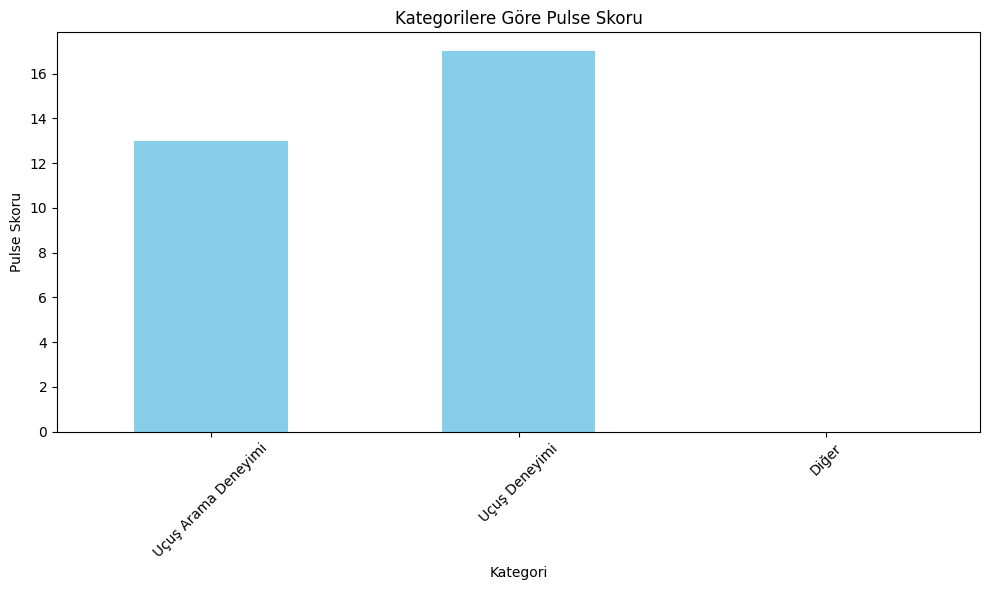

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Örnek bir veri oluşturalım (Gerçek veri yerine, basitleştirilmiş bir örnek)
data = {
    'Kategori': ['Uçuş Arama Deneyimi', 'Uçuş Deneyimi', 'Diğer'],
    'Sentiment Score': [13, 17, 0]
}
df = pd.DataFrame(data)

# Kategorilere göre sentiment skorlarını görselleştirme
plt.figure(figsize=(10, 6))
df.set_index('Kategori')['Sentiment Score'].plot(kind='bar', color='skyblue')
plt.title('Kategorilere Göre Pulse Skoru')
plt.ylabel('Pulse Skoru')
plt.xlabel('Kategori')
plt.xticks(rotation=45)
plt.tight_layout()

# Grafiği gösterme
plt.show()
